In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import join as p_join

import seaborn as sns


##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
X_path = p_join('..', '..', 'data', 'Input.txt')
Y_path = p_join('..', '..', 'data', 'Topology.txt')

X = pd.read_csv(X_path)
Y = pd.read_csv(Y_path)

In [3]:
X.head()

,DATA_for_ML_input_1,DATA_for_ML_input_2,DATA_for_ML_input_3,DATA_for_ML_input_4,DATA_for_ML_input_5,DATA_for_ML_input_6,DATA_for_ML_input_7,DATA_for_ML_input_8,DATA_for_ML_input_9,DATA_for_ML_input_10,...,DATA_for_ML_input_15,DATA_for_ML_input_16,DATA_for_ML_input_17,DATA_for_ML_input_18,DATA_for_ML_input_19,DATA_for_ML_input_20,DATA_for_ML_input_21,DATA_for_ML_input_22,DATA_for_ML_input_23,DATA_for_ML_input_24
0,0.000042,0.000041,0.000457,0.000593,0.004867,0.004202,0.020323,0.023154,0.052425,0.049982,...,0.024883,0.024489,0.052427,0.048663,0.021126,0.024281,0.004774,0.004059,0.000472,0.000526
1,0.000039,0.000466,0.000627,0.005706,0.003682,0.019008,0.024873,0.056917,0.050797,0.026114,...,0.019992,0.051328,0.050117,0.022403,0.024076,0.004747,0.003416,0.000377,0.000679,0.000025
2,0.000696,0.003328,0.003044,0.015012,0.019271,0.044252,0.033750,0.029566,0.034295,0.000932,...,0.001447,0.030134,0.033226,0.044735,0.034791,0.014520,0.019776,0.004132,0.003849,0.000468
3,0.000037,0.000494,0.000246,0.002770,0.004048,0.022708,0.019985,0.049703,0.046507,0.027607,...,0.029893,0.057241,0.048262,0.017697,0.019609,0.003793,0.003842,0.000410,0.000279,0.000041
4,0.000090,0.000801,0.000691,0.005673,0.006629,0.027433,0.023412,0.046985,0.051409,0.012894,...,0.015459,0.053093,0.057416,0.029055,0.024579,0.005753,0.006824,0.000935,0.000876,0.000073


In [4]:
Y.head()

,Var1
0,0
1,1
2,1
3,1
4,1


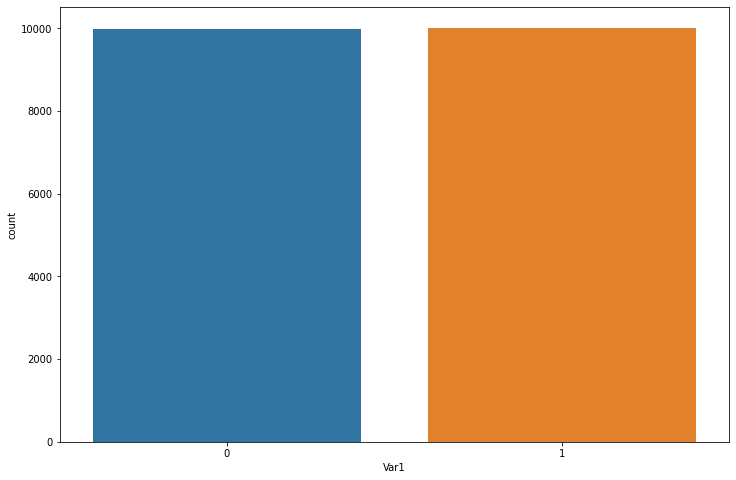

In [5]:
sns.countplot(x="Var1", data=Y)
pass

In [6]:
(Y['Var1'] == 1).sum(), (Y['Var1'] == 0).sum()

(10016, 9983)

### Fetuares distribution visualization

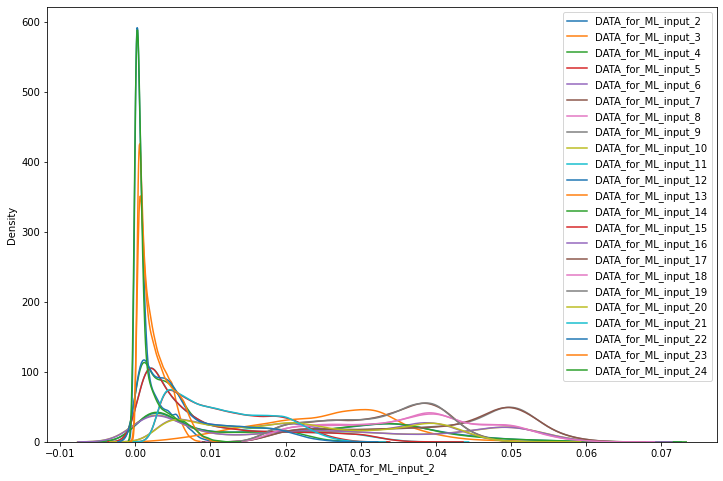

In [7]:
feature_names = list(X.columns)

for f_name in feature_names[1:]:    
    sns.kdeplot(x=f_name, data=X, label=f_name) 
plt.legend()
pass

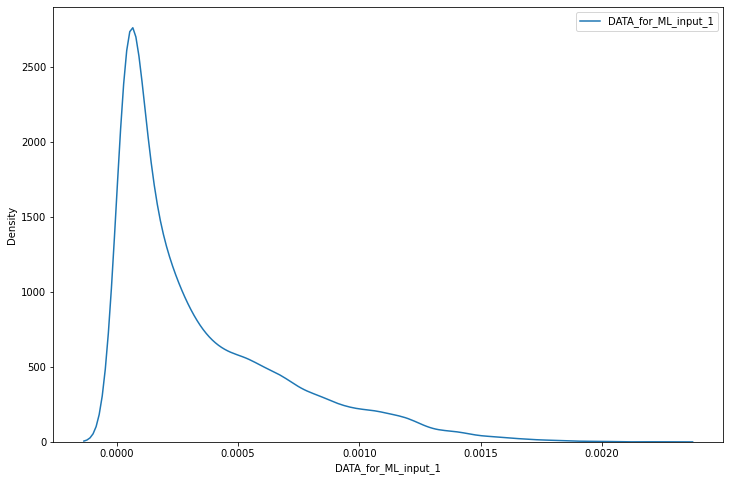

In [8]:
feature_names = list(X.columns)

for f_name in feature_names[:1]:    
    sns.kdeplot(x=f_name, data=X, label=f_name) 
plt.legend()
pass

### PCA

In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(X)

pc_df = pd.DataFrame(data=pc, columns = ['PC1', 'PC2'])
pc_df['target'] = Y.values.squeeze()
pc_df.head()

,PC1,PC2,target
0,-0.022426,0.037837,0
1,0.020171,0.038969,1
2,0.036034,-0.025010,1
3,0.017584,0.044693,1
4,0.030546,0.030103,1


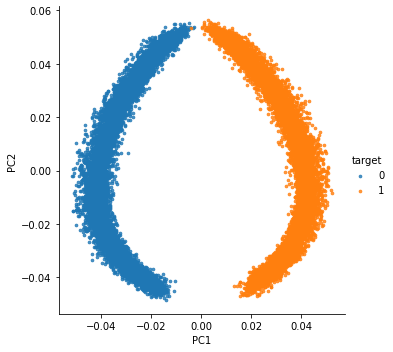

In [10]:
sns.lmplot(x="PC1", y="PC2",
           data=pc_df, 
           fit_reg=False, 
           hue='target', # color by target
           legend=True,
           scatter_kws={"s": 7}) # specify the point size
pass

### TSNE (yet another method for dimensionality reduction)

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=42)
tsne_components = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=tsne_components, columns = ['tsne1', 'tsne2'])
tsne_df['target'] = Y.values.squeeze()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19999 samples in 0.001s...
[t-SNE] Computed neighbors for 19999 samples in 14.010s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19999
[t-SNE] Computed conditional probabilities for sample 2000 / 19999
[t-SNE] Computed conditional probabilities for sample 3000 / 19999
[t-SNE] Computed conditional probabilities for sample 4000 / 19999
[t-SNE] Computed conditional probabilities for sample 5000 / 19999
[t-SNE] Computed conditional probabilities for sample 6000 / 19999
[t-SNE] Computed conditional probabilities for sample 7000 / 19999
[t-SNE] Computed conditional probabilities for sample 8000 / 19999
[t-SNE] Computed conditional probabilities for sample 9000 / 19999
[t-SNE] Computed conditional probabilities for sample 10000 / 19999
[t-SNE] Computed conditional probabilities for sample 11000 / 19999
[t-SNE] Computed conditional probabilities for sample 12000 / 19999
[t-SNE] Computed conditional probabilities for sa

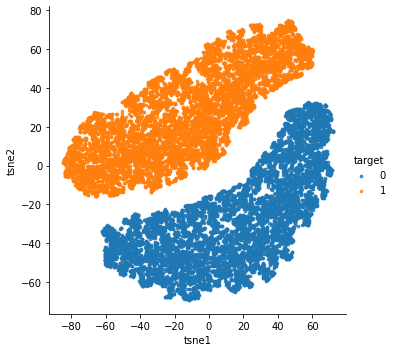

In [14]:
sns.lmplot(x="tsne1", y="tsne2",
           data=tsne_df, 
           fit_reg=False, 
           hue='target', # color by target
           legend=True,
           scatter_kws={"s": 7}) # specify the point size
pass